In [1]:
%matplotlib inline

In [497]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

from statsmodels.robust.scale import mad

from sgmresearchbase.coint.space import normalise, johansen, spectral_autolag
from sgmresearchbase.coint.common import hurst_naive, is_nonstationary
from sgmresearchbase.coint.services import CointegrationService, _zs
from sgmresearchbase.coint.projection import interpolate
from sgmresearchbase.coint.simulation import gen_ar1, dgp2

In [64]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 8)

# Basis estimation for synthetic cointegrated time series:

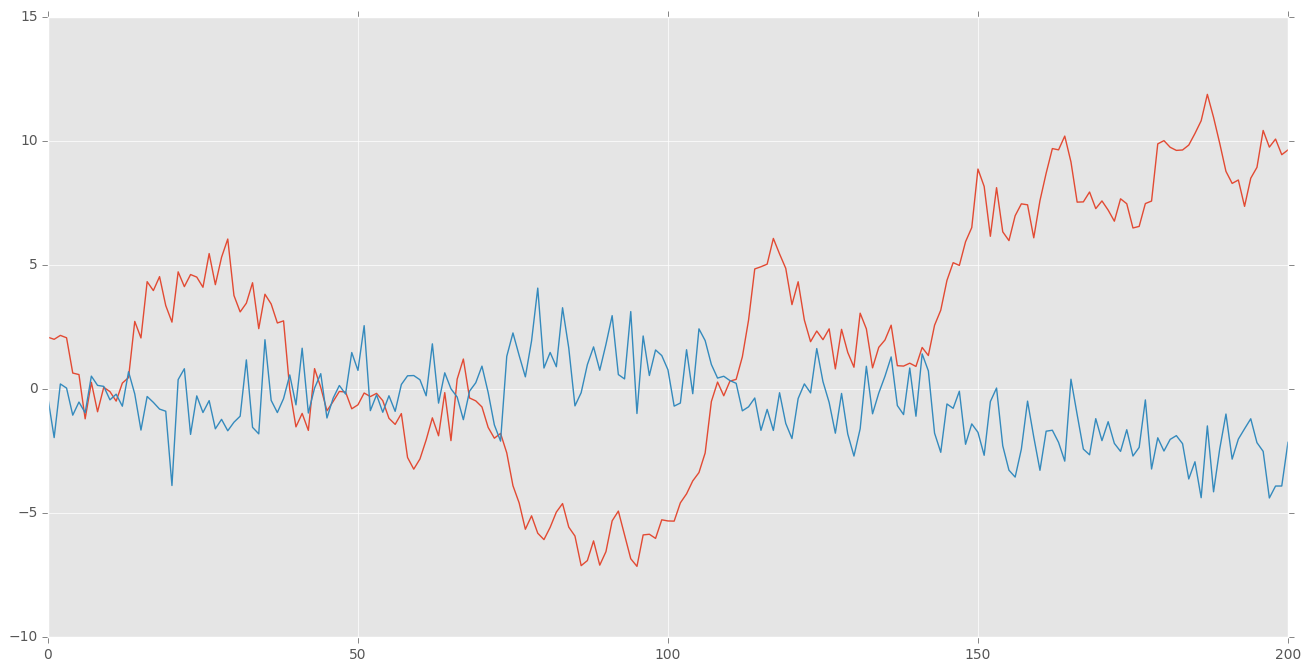

In [511]:
plt.plot(dgp2(2, 1, t_term=200)[0])

In [551]:
def compare_betas(b1, b2):
    signs = np.sign(b1)
    if (signs == -np.sign(b2)).all():
        diff = b1 - np.abs(b2)*signs
    else:
        diff = b1 - b2

    return np.linalg.norm(diff)

In [568]:
def sample_error(estimator=johansen):
    X, beta = dgp2(2, 1, t_term=200)
    est_beta = normalise(estimator(X, 2))

    return compare_betas(beta[:, 0], est_beta[:, 0])

In [569]:
arr_johansen = np.array([sample_error(johansen) for _ in xrange(10000)])
arr_spectral = np.array([sample_error(spectral_autolag) for _ in xrange(10000)])

N errors above 1.0: 19


count    9.981000e+03
mean     9.501556e-03
std      9.741001e-03
min      9.546581e-07
25%      2.929990e-03
50%      6.559970e-03
75%      1.278194e-02
max      1.115767e-01
dtype: float64

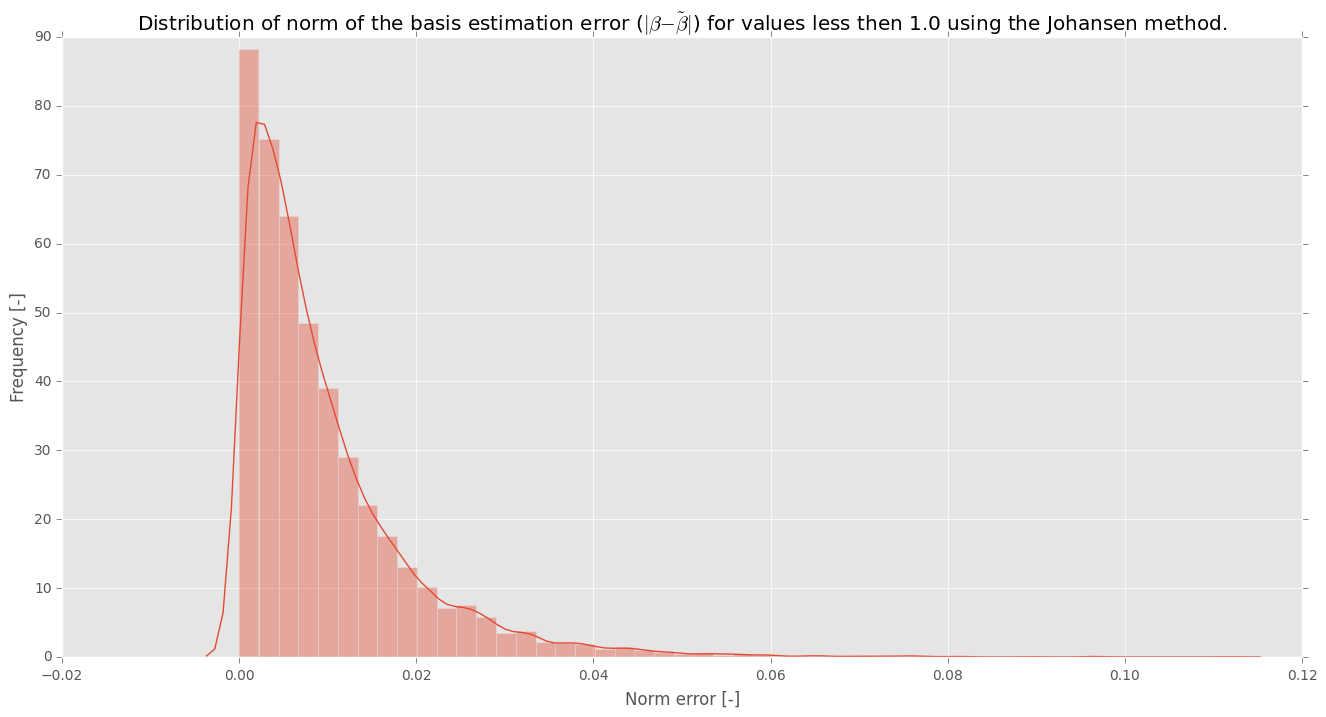

In [570]:
sns.distplot([a for a in arr_johansen if a < 1.0])
plt.title('Distribution of norm of the basis estimation error ($|\\beta - \\tilde{\\beta}|$) for values less then 1.0 using the Johansen method.')
plt.xlabel('Norm error [-]')
plt.ylabel('Frequency [-]')

print 'N errors above 1.0:', len([a for a in arr_johansen if a >= 1.0])
pd.Series([a for a in arr_johansen if a < 1.0]).describe()

N errors above 1.0: 77


count    9923.000000
mean        0.014556
std         0.013561
min         0.000001
25%         0.004994
50%         0.010898
75%         0.020028
max         0.155621
dtype: float64

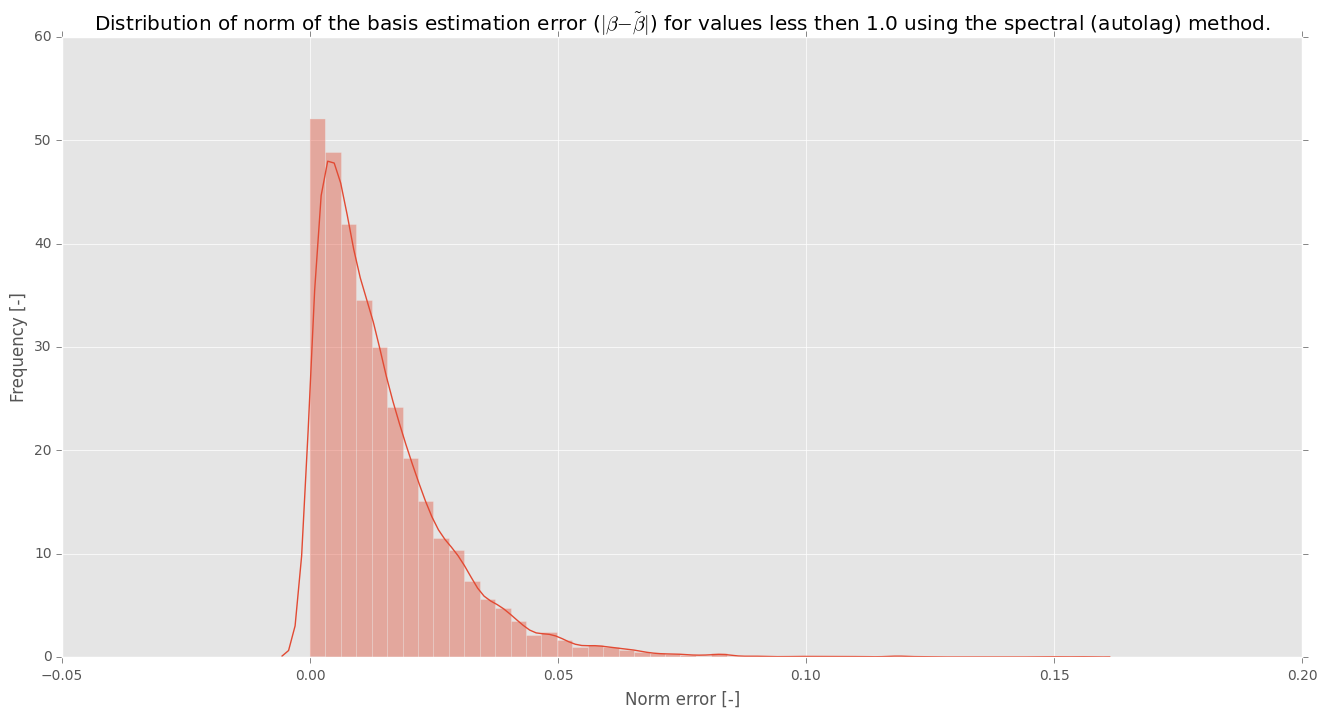

In [571]:
sns.distplot([a for a in arr_spectral if a < 1.0])
plt.title('Distribution of norm of the basis estimation error ($|\\beta - \\tilde{\\beta}|$) for values less then 1.0 using the spectral (autolag) method.')
plt.xlabel('Norm error [-]')
plt.ylabel('Frequency [-]')

print 'N errors above 1.0:', len([a for a in arr_spectral if a >= 1.0])
pd.Series([a for a in arr_spectral if a < 1.0]).describe()